In [1]:
import matplotlib
import matplotlib.pyplot as plt 
from netCDF4 import Dataset
import datetime
import numpy as np
import netCDF4 as netcdf
import pandas as pd
import octant.roms 
import glob
import cartopy
import cartopy.crs as ccrs  # commonly used shorthand
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import calendar
%matplotlib inline

In [4]:
ncfiles_all = ['/d2/copano_bay/2010_n/jan_2010/output_jan_2010.nc',
           '/d2/copano_bay/2010_n/feb_2010/output_feb_2010.nc',
           '/d2/copano_bay/2010_n/march_2010/output_march_2010.nc',
           '/d2/copano_bay/2010_n/april_2010/output_april_2010.nc',
           '/d2/copano_bay/2010_n/may_2010/output_may_2010.nc',
           '/d2/copano_bay/2010_n/june_2010/output_june_2010.nc',
           '/d2/copano_bay/2010_n/july_2010/output_july_2010.nc',
           '/d2/copano_bay/2010_n/aug_2010/output_aug_2010.nc',
           '/d2/copano_bay/2010_n/sep_2010/output_sep_2010.nc',
           '/d2/copano_bay/2010_n/oct_2010/output_oct_2010.nc',
           '/d2/copano_bay/2010_n/nov_2010/output_nov_2010.nc',
           '/d2/copano_bay/2010_n/dec_2010/output_dec_2010.nc',
           '/d2/copano_bay/2011_n/jan_2011/output_jan_2011.nc',
           '/d2/copano_bay/2011_n/feb_2011/output_feb_2011.nc',
           '/d2/copano_bay/2011_n/march_2011/output_march_2011.nc',
           '/d2/copano_bay/2011_n/april_2011/output_april_2011.nc',
           '/d2/copano_bay/2011_n/may_2011/output_may_2011.nc',
           '/d2/copano_bay/2011_n/june_2011/output_june_2011.nc',
           '/d2/copano_bay/2011_n/july_2011/output_july_2011.nc',
           '/d2/copano_bay/2011_n/aug_2011/output_aug_2011.nc',
           '/d2/copano_bay/2011_n/sep_2011/output_sep_2011.nc',
           '/d2/copano_bay/2011_n/oct_2011/output_oct_2011.nc',
           '/d2/copano_bay/2011_n/nov_2011/output_nov_2011.nc',
           '/d2/copano_bay/2011_n/dec_2011/output_dec_2011.nc',
           '/d2/copano_bay/2012_n/jan_2012/output_jan_2012.nc',
           '/d2/copano_bay/2012_n/feb_2012/output_feb_2012.nc',
           '/d2/copano_bay/2012_n/march_2012/output_march_2012.nc',
           '/d2/copano_bay/2012_n/april_2012/output_april_2012.nc',
           '/d2/copano_bay/2012_n/may_2012/output_may_2012.nc',
           '/d2/copano_bay/2012_n/june_2012/output_june_2012.nc',
           '/d2/copano_bay/2012_n/july_2012/output_july_2012.nc',
           '/d2/copano_bay/2012_n/aug_2012/output_aug_2012.nc',
           '/d2/copano_bay/2012_n/sep_2012/output_sep_2012.nc',
           '/d2/copano_bay/2012_n/oct_2012/output_oct_2012.nc',
           '/d2/copano_bay/2012_n/nov_2012/output_nov_2012.nc',
           '/d2/copano_bay/2012_n/dec_2012/output_dec_2012.nc',
           '/d2/copano_bay/2013_n/jan_2013/output_jan_2013.nc',
           '/d2/copano_bay/2013_n/feb_2013/output_feb_2013.nc',
           '/d2/copano_bay/2013_n/march_2013/output_march_2013.nc',
           '/d2/copano_bay/2013_n/april_2013/output_april_2013.nc',
           '/d2/copano_bay/2013_n/may_2013/output_may_2013.nc',
           '/d2/copano_bay/2013_n/june_2013/output_june_2013.nc',
           '/d2/copano_bay/2013_n/july_2013/output_july_2013.nc',
           '/d2/copano_bay/2013_n/aug_2013/output_aug_2013.nc',
           '/d2/copano_bay/2013_n/sep_2013/output_sep_2013.nc',
           '/d2/copano_bay/2013_n/oct_2013/output_oct_2013.nc',
           '/d2/copano_bay/2013_n/nov_2013/output_nov_2013.nc',
           '/d2/copano_bay/2013_n/dec_2013/output_dec_2013.nc',
           '/d2/copano_bay/2014_n/jan_2014/output_jan_2014.nc',
           '/d2/copano_bay/2014_n/feb_2014/output_feb_2014.nc',
           '/d2/copano_bay/2014_n/march_2014/output_march_2014.nc',
           '/d2/copano_bay/2014_n/april_2014/output_april_2014.nc',
           '/d2/copano_bay/2014_n/may_2014/output_may_2014.nc',
           '/d2/copano_bay/2014_n/june_2014/output_june_2014.nc',
           '/d2/copano_bay/2014_n/july_2014/output_july_2014.nc',
           '/d2/copano_bay/2014_n/aug_2014/output_aug_2014.nc',
           '/d2/copano_bay/2014_n/sep_2014/output_sep_2014.nc',
           '/d2/copano_bay/2014_n/oct_2014/output_oct_2014.nc',
           '/d2/copano_bay/2014_n/nov_2014/output_nov_2014.nc',
           '/d2/copano_bay/2014_n/dec_2014/output_dec_2014.nc',
           '/d2/copano_bay/2015_n/jan_2015/output_jan_2015.nc',
           '/d2/copano_bay/2015_n/feb_2015/output_feb_2015.nc',
           '/d2/copano_bay/2015_n/march_2015/output_march_2015.nc',
           '/d2/copano_bay/2015_n/april_2015/output_april_2015.nc',
           '/d2/copano_bay/2015_n/may_2015/output_may_2015.nc',
           '/d2/copano_bay/2015_n/june_2015/output_june_2015.nc',
           '/d2/copano_bay/2015_n/july_2015/output_july_2015.nc',
           '/d2/copano_bay/2015_n/aug_2015/output_aug_2015.nc',
           '/d2/copano_bay/2015_n/sep_2015/output_sep_2015.nc',
           '/d2/copano_bay/2015_n/oct_2015/output_oct_2015.nc',
           '/d2/copano_bay/2015_n/nov_2015/output_nov_2015.nc',
           '/d2/copano_bay/2015_n/dec_2015/output_dec_2015.nc',]

nc = netcdf.MFDataset(['/d2/copano_bay/2010_n/jan_2010/output_jan_2010.nc',
           '/d2/copano_bay/2010_n/feb_2010/output_feb_2010.nc',
           '/d2/copano_bay/2010_n/march_2010/output_march_2010.nc',
           '/d2/copano_bay/2010_n/april_2010/output_april_2010.nc',
           '/d2/copano_bay/2010_n/may_2010/output_may_2010.nc',
           '/d2/copano_bay/2010_n/june_2010/output_june_2010.nc',
           '/d2/copano_bay/2010_n/july_2010/output_july_2010.nc',
           '/d2/copano_bay/2010_n/aug_2010/output_aug_2010.nc',
           '/d2/copano_bay/2010_n/sep_2010/output_sep_2010.nc',
           '/d2/copano_bay/2010_n/oct_2010/output_oct_2010.nc',
           '/d2/copano_bay/2010_n/nov_2010/output_nov_2010.nc',
           '/d2/copano_bay/2010_n/dec_2010/output_dec_2010.nc',
           '/d2/copano_bay/2011_n/jan_2011/output_jan_2011.nc',
           '/d2/copano_bay/2011_n/feb_2011/output_feb_2011.nc',
           '/d2/copano_bay/2011_n/march_2011/output_march_2011.nc',
           '/d2/copano_bay/2011_n/april_2011/output_april_2011.nc',
           '/d2/copano_bay/2011_n/may_2011/output_may_2011.nc',
           '/d2/copano_bay/2011_n/june_2011/output_june_2011.nc',
           '/d2/copano_bay/2011_n/july_2011/output_july_2011.nc',
           '/d2/copano_bay/2011_n/aug_2011/output_aug_2011.nc',
           '/d2/copano_bay/2011_n/sep_2011/output_sep_2011.nc',
           '/d2/copano_bay/2011_n/oct_2011/output_oct_2011.nc',
           '/d2/copano_bay/2011_n/nov_2011/output_nov_2011.nc',
           '/d2/copano_bay/2011_n/dec_2011/output_dec_2011.nc',
           '/d2/copano_bay/2012_n/jan_2012/output_jan_2012.nc',
           '/d2/copano_bay/2012_n/feb_2012/output_feb_2012.nc',
           '/d2/copano_bay/2012_n/march_2012/output_march_2012.nc',
           '/d2/copano_bay/2012_n/april_2012/output_april_2012.nc',
           '/d2/copano_bay/2012_n/may_2012/output_may_2012.nc',
           '/d2/copano_bay/2012_n/june_2012/output_june_2012.nc',
           '/d2/copano_bay/2012_n/july_2012/output_july_2012.nc',
           '/d2/copano_bay/2012_n/aug_2012/output_aug_2012.nc',
           '/d2/copano_bay/2012_n/sep_2012/output_sep_2012.nc',
           '/d2/copano_bay/2012_n/oct_2012/output_oct_2012.nc',
           '/d2/copano_bay/2012_n/nov_2012/output_nov_2012.nc',
           '/d2/copano_bay/2012_n/dec_2012/output_dec_2012.nc',
           '/d2/copano_bay/2013_n/jan_2013/output_jan_2013.nc',
           '/d2/copano_bay/2013_n/feb_2013/output_feb_2013.nc',
           '/d2/copano_bay/2013_n/march_2013/output_march_2013.nc',
           '/d2/copano_bay/2013_n/april_2013/output_april_2013.nc',
           '/d2/copano_bay/2013_n/may_2013/output_may_2013.nc',
           '/d2/copano_bay/2013_n/june_2013/output_june_2013.nc',
           '/d2/copano_bay/2013_n/july_2013/output_july_2013.nc',
           '/d2/copano_bay/2013_n/aug_2013/output_aug_2013.nc',
           '/d2/copano_bay/2013_n/sep_2013/output_sep_2013.nc',
           '/d2/copano_bay/2013_n/oct_2013/output_oct_2013.nc',
           '/d2/copano_bay/2013_n/nov_2013/output_nov_2013.nc',
           '/d2/copano_bay/2013_n/dec_2013/output_dec_2013.nc',
           '/d2/copano_bay/2014_n/jan_2014/output_jan_2014.nc',
           '/d2/copano_bay/2014_n/feb_2014/output_feb_2014.nc',
           '/d2/copano_bay/2014_n/march_2014/output_march_2014.nc',
           '/d2/copano_bay/2014_n/april_2014/output_april_2014.nc',
           '/d2/copano_bay/2014_n/may_2014/output_may_2014.nc',
           '/d2/copano_bay/2014_n/june_2014/output_june_2014.nc',
           '/d2/copano_bay/2014_n/july_2014/output_july_2014.nc',
           '/d2/copano_bay/2014_n/aug_2014/output_aug_2014.nc',
           '/d2/copano_bay/2014_n/sep_2014/output_sep_2014.nc',
           '/d2/copano_bay/2014_n/oct_2014/output_oct_2014.nc',
           '/d2/copano_bay/2014_n/nov_2014/output_nov_2014.nc',
           '/d2/copano_bay/2014_n/dec_2014/output_dec_2014.nc',
           '/d2/copano_bay/2015_n/jan_2015/output_jan_2015.nc',
           '/d2/copano_bay/2015_n/feb_2015/output_feb_2015.nc',
           '/d2/copano_bay/2015_n/march_2015/output_march_2015.nc',
           '/d2/copano_bay/2015_n/april_2015/output_april_2015.nc',
           '/d2/copano_bay/2015_n/may_2015/output_may_2015.nc',
           '/d2/copano_bay/2015_n/june_2015/output_june_2015.nc',
           '/d2/copano_bay/2015_n/july_2015/output_july_2015.nc',
           '/d2/copano_bay/2015_n/aug_2015/output_aug_2015.nc',
           '/d2/copano_bay/2015_n/sep_2015/output_sep_2015.nc',
           '/d2/copano_bay/2015_n/oct_2015/output_oct_2015.nc',
           '/d2/copano_bay/2015_n/nov_2015/output_nov_2015.nc',
           '/d2/copano_bay/2015_n/dec_2015/output_dec_2015.nc'])

# ds = xarray.open_mfdataset(ncfiles_all)
ncgrd = Dataset('/home/dylan/Grid_Files/copano_bay_grd_g300_new2.nc')
h = ncgrd['h']

In [6]:
# ncgrd = Dataset('/home/dylan/copano_bay_grd_g300_new2.nc')
Cs_w = ncgrd['Cs_w'][:]
Cs_r = ncgrd['Cs_r'][:]
sw = ncgrd['s_w'][:]
sr = ncgrd['s_rho'][:]
h = ncgrd['h'][:,:]
hc = 0.5
N = 20

In [57]:
# time = ds['ocean_time'][:10]
salt_bar = []
salt_var = []
mask = (ncgrd['lon_rho'][:,:] >= -97.124)
dx = 1.0/nc['pm'][0] * mask
dy = 1.0/nc['pn'][0] * mask
zw = h[np.newaxis,:,:]*(hc*sw[:,np.newaxis,np.newaxis] + h[np.newaxis,:,:]*Cs_w[:,np.newaxis,np.newaxis])/(hc+h[np.newaxis,:,:], ) [0]
dz = np.diff(zw, axis=0)* mask
dV = dx*dy*dz
volume = np.sum(dx * dy * dz)

In [58]:
def get_stuf(nc, tidx):
    salt = nc['salt'][tidx,:,:,:]*mask
    sb = np.sum(salt[:,:,:] * dV[:,:,:] ) / volume
    salt_var = np.sum( (salt - sb)**2 * dV)/volume
    return salt_var

In [59]:
salt_var = []
time = netcdf.num2date(nc['ocean_time'][:], nc['ocean_time'].units)
for tidx in range(len(time)):
    try:
        salt_var.append(get_stuf(nc, tidx))
    except:
        df_new = pd.DataFrame({'salt_var': salt_var, 'time':time})
        df_new.set_index('time')
        df_new.to_csv('Salinity_Variance_Copano_East1_-97125.csv')
    
df_new = pd.DataFrame({'salt_var': salt_var, 'time':time})
df_new.set_index('time')
df_new.to_csv('Salinity_Variance_Copano_East1_-97125.csv')


/opt/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:6641: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


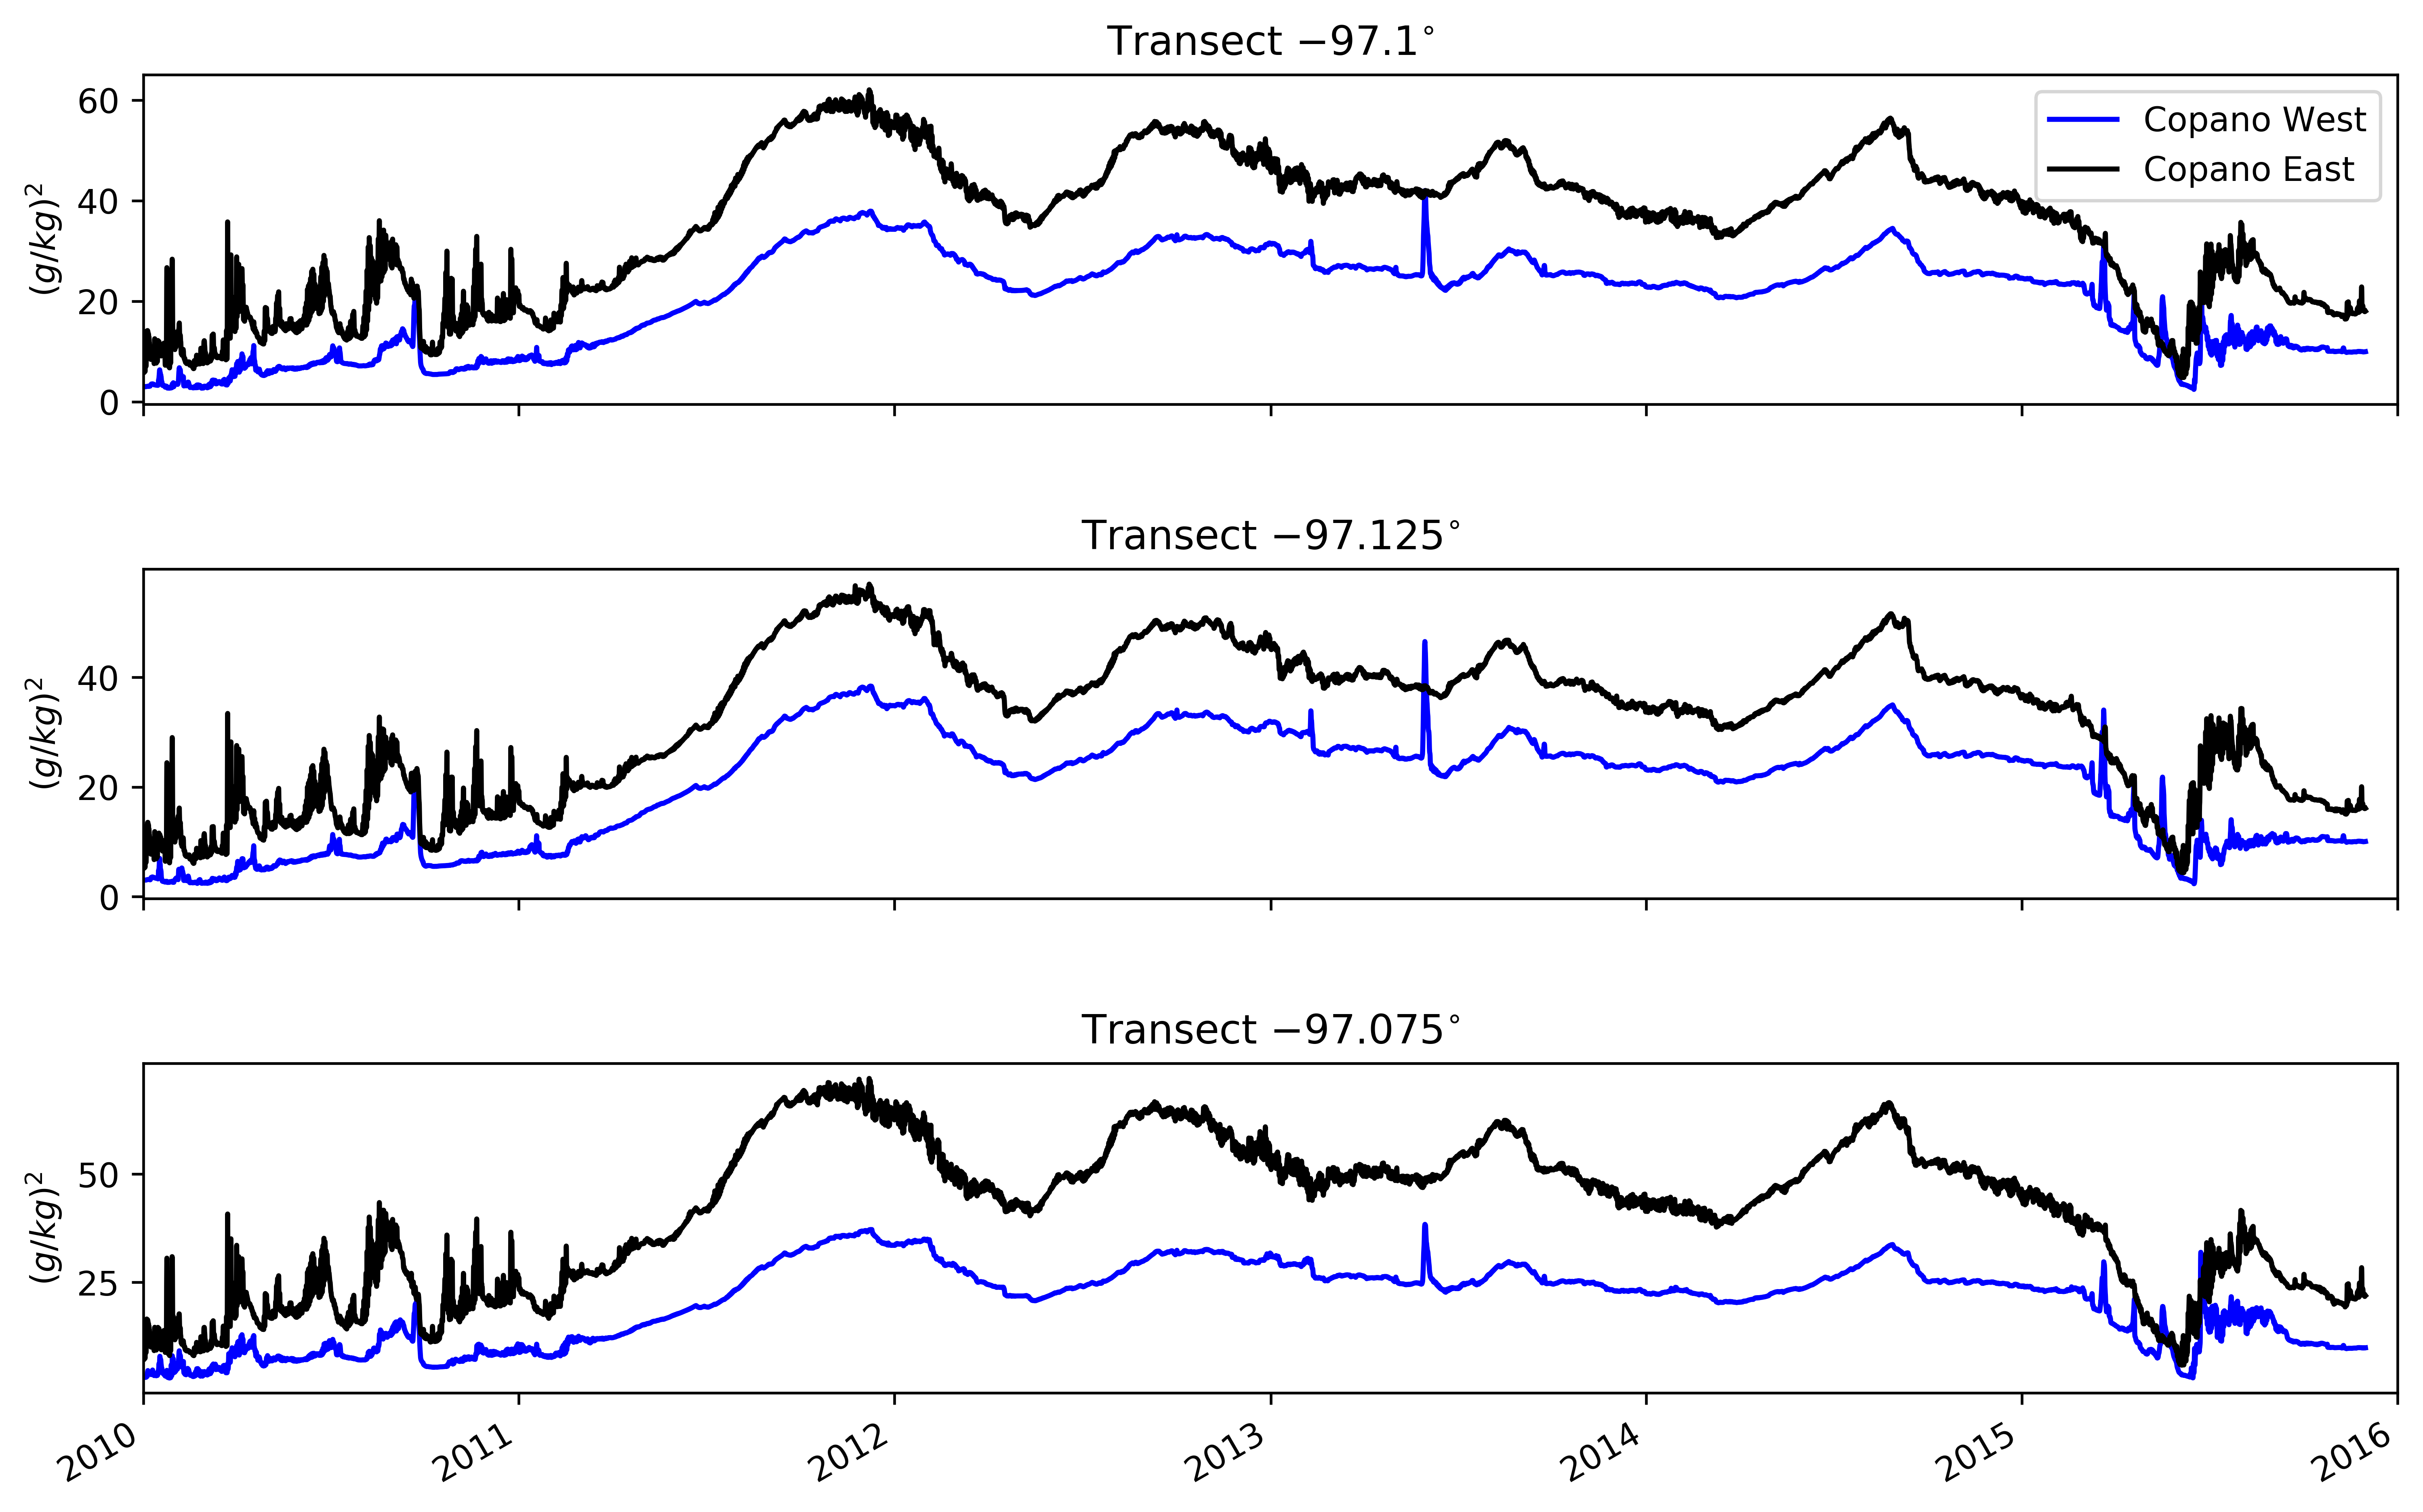

In [82]:
df1 = pd.read_csv('/home/dylan/Sensitivity_Study/Salinity_Variance_Copano_West.csv', index_col = 3, parse_dates=[3])
df2 = pd.read_csv('/home/dylan/Sensitivity_Study/Salinity_Variance_Copano_East.csv', index_col=3, parse_dates=[3])
df3 = pd.read_csv('/home/dylan/Salinity_Variance_Copano_West1_-97125.csv', index_col = 2, parse_dates=[2])
df4 = pd.read_csv('/home/dylan/Salinity_Variance_Copano_East1_-97125.csv', index_col=2, parse_dates=[2])
df5 = pd.read_csv('/home/dylan/Sensitivity_Study/Salinity_Variance_Copano_West_-97075.csv', index_col = 2, parse_dates=[2])
df6 = pd.read_csv('/home/dylan/Sensitivity_Study/Salinity_Variance_Copano_East_-97075.csv', index_col=2, parse_dates=[2])

fig = plt.figure(figsize=(12,8),dpi=600)
fig.tight_layout()
fig.subplots_adjust(hspace=.5)

ax1 = plt.subplot(3,1,1)
df1['salt_var'].plot(color='b', label='Copano West')
df2['salt_var'].plot(color='k',label='Copano East')
ax1.set_ylabel('$(g/kg)^{2}$')
ax1.set_title('Transect $-97.1^{\circ}$')
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.set_xlim(['2010-1-1','2016-1-1'])
ax1.legend(loc = 0)

ax2 = plt.subplot(3,1,2)
df3['salt_var'].plot(color='b', label='Copano West')
df4['salt_var'].plot(color='k',label='Copano East')
ax2.set_ylabel('$(g/kg)^{2}$')
ax2.set_title('Transect $-97.125^{\circ}$')
ax2.set_xlabel('')
ax2.set_xticklabels([])
ax2.set_xlim(['2010-1-1','2016-1-1'])
# ax2.legend()

ax3 = plt.subplot(3,1,3)
df5['salt_var'].plot(color='b', label='Copano West')
df6['salt_var'].plot(color='k',label='Copano East')
ax3.set_ylabel('$(g/kg)^{2}$')
ax3.set_title('Transect $-97.075^{\circ}$')
ax3.set_xlabel('')
ax3.set_xlim(['2010-1-1','2016-1-1'])
ax3.set_yticks([25,50])
# ax3.legend()


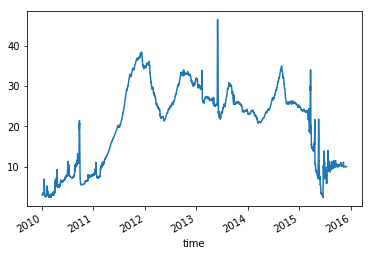

In [54]:
df3 = pd.read_csv('/home/dylan/Salinity_Variance_Copano_West1_-97125.csv', index_col = [2], parse_dates=[2])
df3
df3['salt_var'].plot()

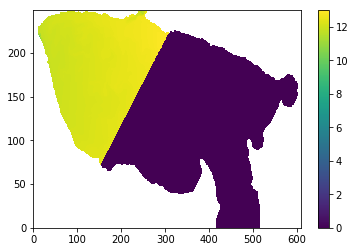

In [28]:
plt.pcolormesh(nc['salt'][5,1,:,:]*~mask)
plt.colorbar()